In [1]:
from mot_analysis.motimg import MOTImaging
# blue mot tof flight measurement
import os
import glob
import h5py
import json
import matplotlib.pyplot as plt
import numpy as np
import datetime

In [2]:
## WINDOWS: On your .ipynb, import this plotting_style by adding in and uncommenting the following lines:
import matplotlib.pyplot as plt
import sys
sys.path.append('C:/Users/Michael/Dropbox/AION/Projects')  # Replace with the relevant path that contains this script
from plotting_style import set_plotting_style
set_plotting_style()

## MAC: On your .ipynb, import this plotting_style by adding in and uncommenting the following lines:
# import matplotlib.pyplot as plt
# import sys
# sys.path.append('/Users/michael/Dropbox/AION/Projects')  # Replace with the relevant path that contains this script
# from plotting_style import set_plotting_style
# set_plotting_style()


import matplotlib.pyplot as plt

print('Initialising plotting style...')

def set_plotting_style():
    plt.rc("font", family = 'Arial', size=10)
    plt.rc('axes', labelsize=20, titlesize = 20, labelpad=5)
    plt.rc('xtick', labelsize=18)
    plt.rc('ytick', labelsize=18)
    plt.rc('legend', fontsize=15)

print('Success! Plotting style initialised.')

Initialising plotting style...
Success! Plotting style initialised.
Initialising plotting style...
Success! Plotting style initialised.


Text(0.5, 1.0, 'Calibration curve for red beam power efficiency')

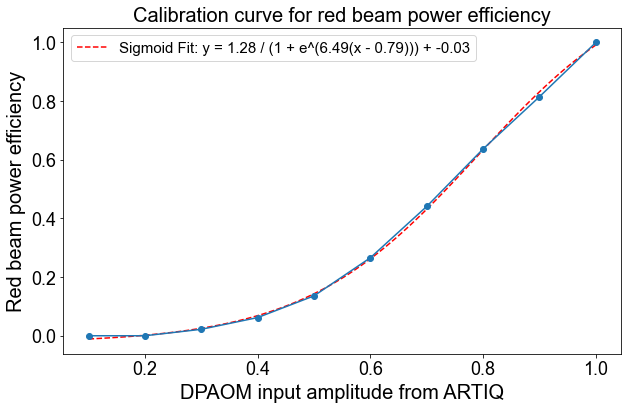

In [46]:
from scipy.optimize import curve_fit

amp = [1,0.9,0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1]
efficiency = [1, 0.815, 0.637, 0.441, 0.266, 0.136, 0.062, 0.022,0,0]

# fit the data with a sigmoid function for an acoustic optic modulator
def sigmoid_func(x, a, b, c, d):
    return a / (1 + np.exp(-b * (x - c))) + d

weights = np.ones_like(efficiency)
weights[:-5] = 0.1  # Give more weight to data points

popt_sigmoid, pcov_sigmoid = curve_fit(sigmoid_func, amp, efficiency)

# Plot the fitted sigmoid curve
x_fit_sigmoid = np.linspace(min(amp), max(amp), 100)
y_fit_sigmoid = sigmoid_func(x_fit_sigmoid, *popt_sigmoid)

plt.figure(figsize=(10,6))
plt.plot(x_fit_sigmoid, y_fit_sigmoid, 'r--', label=f'Sigmoid Fit: y = {popt_sigmoid[0]:.2f} / (1 + e^({popt_sigmoid[1]:.2f}(x - {popt_sigmoid[2]:.2f}))) + {popt_sigmoid[3]:.2f}')
plt.legend()

plt.plot(amp, efficiency, 'o-')
plt.xlabel('DPAOM input amplitude from ARTIQ',fontsize=20)
plt.ylabel('Red beam power efficiency',fontsize=20)
plt.title('Calibration curve for red beam power efficiency')

# Import and quick plot

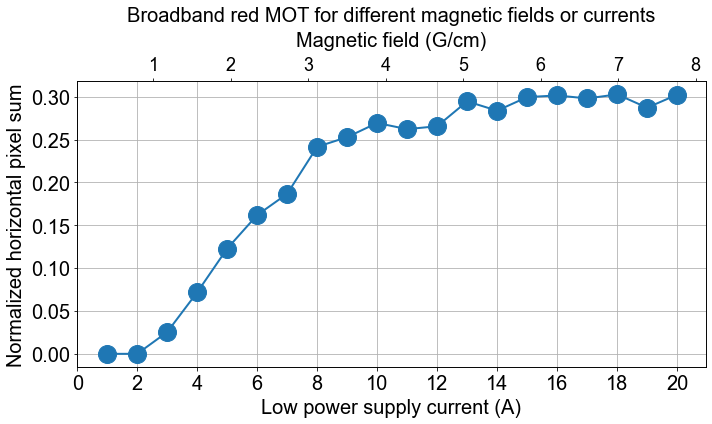

In [95]:
file_path = r"Z:\AION\Data\2024\11\05\bbredmot_mike_bfield\000016620-MeasureRedMOT.h5"
# Open the HDF5 file to extract the relevant datasets
with h5py.File(file_path, 'r') as h5file:
    # Extracting the axis and data for plotting
    x_data = h5file['datasets/ndscan.rid_16620.points.axis_0'][:]
    y_data = h5file['datasets/ndscan.rid_16620.points.channel_red_mot_normalised_bg_corrected_img_sum_horiz'][:]

plt.figure(figsize=(10, 6))
plt.plot(x_data, y_data/10,'o-', markersize=18, linewidth=2)
plt.xlabel('Low power supply current (A)',fontsize=20)
plt.ylabel('Normalized horizontal pixel sum',fontsize=20)
plt.xticks(np.linspace(0, 20, 11))
plt.tick_params(axis='both', which='major', labelsize=20)
plt.title('Broadband red MOT for different magnetic fields or currents',fontsize=20,pad=10)
plt.grid(True)

magnetic_field = [i*0.388 for i in x_data]
ax2 = plt.twiny()
ax2.plot(magnetic_field, y_data/10, alpha=0)
ax2.set_xlabel('Magnetic field (G/cm)',fontsize=20,labelpad=10)

plt.tight_layout()
plt.savefig('Broadband red MOT for different magnetic fields.pdf', dpi=1200)

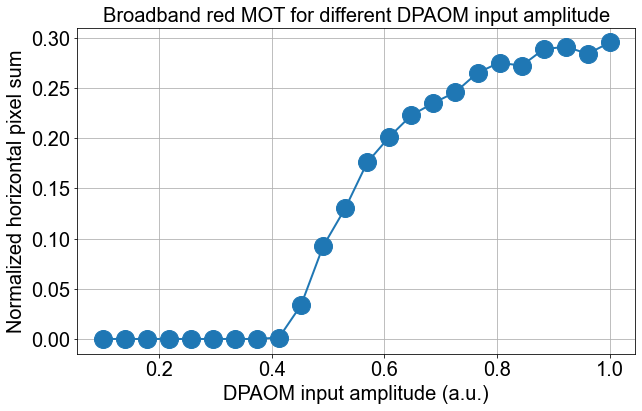

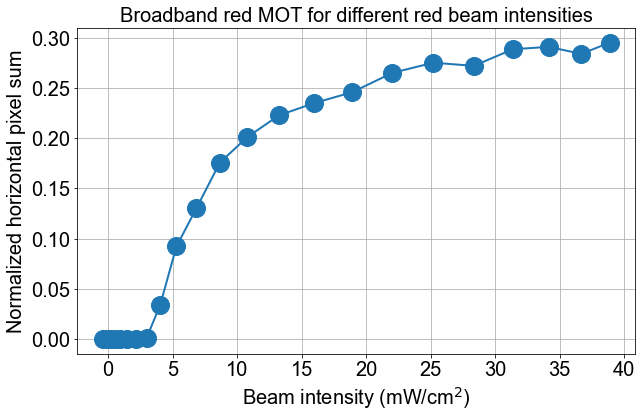

In [54]:
file_path = r"Z:\AION\Data\2024\11\05\bbredmot_mike_DPAOMamp\000016618-MeasureRedMOT.h5"
# Open the HDF5 file to extract the relevant datasets
with h5py.File(file_path, 'r') as h5file:
    # Extracting the axis and data for plotting
    x_data = h5file['datasets/ndscan.rid_16618.points.axis_0'][:]
    y_data = h5file['datasets/ndscan.rid_16618.points.channel_red_mot_normalised_bg_corrected_img_sum_horiz'][:]

plt.figure(figsize=(10, 6))
plt.plot(x_data, y_data/10,'o-', markersize=18, linewidth=2)
plt.xlabel('DPAOM input amplitude (a.u.)',fontsize=20)
plt.ylabel('Normalized horizontal pixel sum',fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.title('Broadband red MOT for different DPAOM input amplitude',fontsize=20)
# plt.legend(loc='upper left')
plt.grid(True)
# plt.savefig('Broadband red MOT for different DPAOM input amplitude.pdf', dpi=1200)

# convert the DPAOM amplitude to beam intensity and plot as second x-axis
beam_power = sigmoid_func(x_data, *popt_sigmoid) * 20.73
beam_intensity = 2*beam_power/(np.pi*0.58**2)
plt.figure(figsize=(10, 6))
plt.plot(beam_intensity, y_data/10,'o-', markersize=18, linewidth=2)
plt.xlabel(r'Beam intensity (mW/cm$^2$)',fontsize=20)
plt.ylabel('Normalized horizontal pixel sum',fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.title('Broadband red MOT for different red beam intensities',fontsize=20)
# plt.legend(loc='upper left')
plt.grid(True)

# plt.tight_layout()
# plt.savefig('Broadband red MOT for different red beam intensities.pdf', dpi=1200)

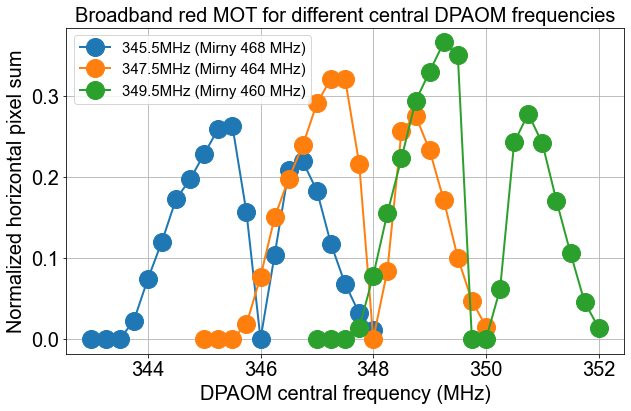

In [35]:
file_path = r"Z:\AION\Data\2024\11\05\bbredmot_mike_mariam_yj\DPAOMcentral3495MHz\000016609-MeasureRedMOT.h5"
# Open the HDF5 file to extract the relevant datasets
with h5py.File(file_path, 'r') as h5file:
    # Extracting the axis and data for plotting
    x_data_3495 = h5file['datasets/ndscan.rid_16609.points.axis_0'][:]
    y_data_3495 = h5file['datasets/ndscan.rid_16609.points.channel_red_mot_normalised_bg_corrected_img_sum_horiz'][:]

file_path = r"Z:\AION\Data\2024\11\05\bbredmot_mike_mariam_yj\DPAOMcentral3475MHzround2\000016612-MeasureRedMOT.h5"
with h5py.File(file_path, 'r') as h5file:
    # Extracting the axis and data for plotting
    x_data_3475 = h5file['datasets/ndscan.rid_16612.points.axis_0'][:]
    y_data_3475 = h5file['datasets/ndscan.rid_16612.points.channel_red_mot_normalised_bg_corrected_img_sum_horiz'][:]

file_path = r"Z:\AION\Data\2024\11\05\bbredmot_mike_mariam_yj\DPAOMcentral3455MHz\000016614-MeasureRedMOT.h5"
with h5py.File(file_path, 'r') as h5file:
    # Extracting the axis and data for plotting
    x_data_3455 = h5file['datasets/ndscan.rid_16614.points.axis_0'][:]
    y_data_3455 = h5file['datasets/ndscan.rid_16614.points.channel_red_mot_normalised_bg_corrected_img_sum_horiz'][:]

plt.figure(figsize=(10, 6))
plt.plot(x_data_3455/1e6, y_data_3455/10,'o-', markersize=18, linewidth=2, label='345.5MHz (Mirny 468 MHz)')
plt.plot(x_data_3475/1e6, y_data_3475/10,'o-', markersize=18, linewidth=2, label='347.5MHz (Mirny 464 MHz)')
plt.plot(x_data_3495/1e6, y_data_3495/10,'o-', markersize=18, linewidth=2, label='349.5MHz (Mirny 460 MHz)')
plt.xlabel('DPAOM central frequency (MHz)',fontsize=20)
plt.ylabel('Normalized horizontal pixel sum',fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.title('Broadband red MOT for different central DPAOM frequencies',fontsize=20)
plt.legend(loc='upper left')
plt.grid(True)
# plt.tight_layout()
plt.savefig('Broadband red MOT for different central DPAOM frequencies separate.pdf', dpi=1200)

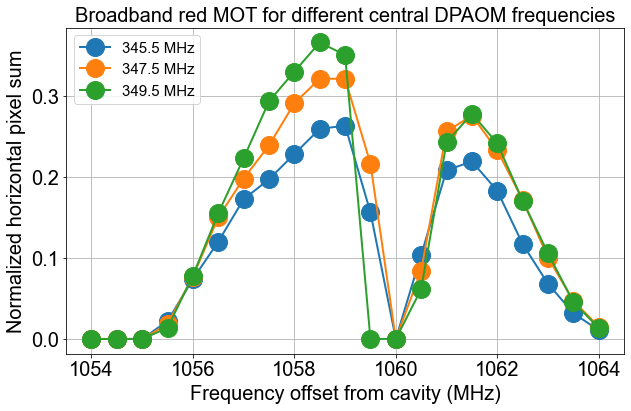

In [37]:
frequencyoffsetfromcavity = np.linspace(1054, 1064, 21)

plt.figure(figsize=(10, 6))
plt.plot(frequencyoffsetfromcavity, y_data_3455/10,'o-', markersize=18, linewidth=2, label='345.5 MHz')
plt.plot(frequencyoffsetfromcavity, y_data_3475/10,'o-', markersize=18, linewidth=2, label='347.5 MHz')
plt.plot(frequencyoffsetfromcavity, y_data_3495/10,'o-', markersize=18, linewidth=2, label='349.5 MHz')
plt.xlabel('Frequency offset from cavity (MHz)',fontsize=20)
plt.ylabel('Normalized horizontal pixel sum',fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.title('Broadband red MOT for different central DPAOM frequencies',fontsize=20)
plt.legend(loc='upper left')
plt.grid(True)
# plt.tight_layout()
plt.savefig('Broadband red MOT for different central DPAOM frequencies combined.pdf', dpi=1200)